In [5]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

In [18]:
df = pd.read_excel("C:/Users/KOROPEYB/Desktop/Rate Engineering/Tesla EV Charging Standard Vs. Standby Rates Comparison assignment 1_5_2021/trial.xlsx",sheet_name= "Sheet1")



In [19]:
df.head()


,Date,DailyPk,P1,P2b,P2a
0,2019-09-01,0.000,0.000,0.000,0.0
1,2019-09-02,164.520,164.520,164.520,0.0
2,2019-09-03,126.792,126.792,126.792,0.0
3,2019-09-04,245.160,245.160,245.160,0.0
4,2019-09-05,139.824,139.824,139.824,0.0


In [21]:
y = df.groupby('Date')['DailyPk'].sum().reset_index()



In [23]:
y

,Date,DailyPk
0,2019-09-01,0.000
1,2019-09-02,164.520
2,2019-09-03,126.792
3,2019-09-04,245.160
4,2019-09-05,139.824
...,...,...
362,2020-08-28,199.296
363,2020-08-29,0.000
364,2020-08-30,0.000
365,2020-08-31,192.096


In [24]:
y = y.set_index('Date')

y.index

DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10',
               ...
               '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26',
               '2020-08-27', '2020-08-28', '2020-08-29', '2020-08-30',
               '2020-08-31', '2020-09-01'],
              dtype='datetime64[ns]', name='Date', length=367, freq=None)

In [25]:

y = y['DailyPk'].resample('MS').mean()

In [26]:
y


Date
2019-09-01     99.554400
2019-10-01    109.119484
2019-11-01    107.827200
2019-12-01    133.762065
2020-01-01    145.321548
2020-02-01    119.564690
2020-03-01    107.131355
2020-04-01     73.077600
2020-05-01     63.796645
2020-06-01     89.450400
2020-07-01    142.759742
2020-08-01    139.533677
2020-09-01      0.000000
Freq: MS, Name: DailyPk, dtype: float64

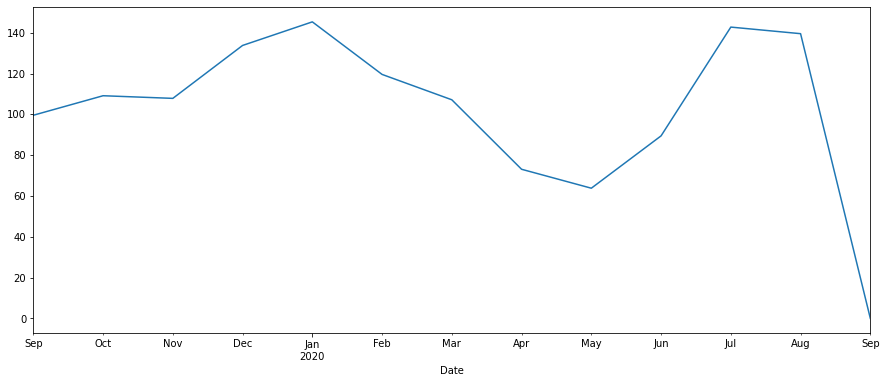

In [27]:
y.plot(figsize = (15,6))

In [28]:
plt.show()

In [29]:

from pylab import rcParams
rcParams['figure.figsize'] = 18,8

In [30]:

decomposition = sm.tsa.seasonal_decompose(y, model= 'additive')
			# breaks it down into the seasonal & trend components

fig = decomposition.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 13 observation(s)